In [1]:
import os
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io as io

In [2]:
loc = io.loadmat("../DeepMIMO/RayTracing Scenarios/I1_2p4/I1_2p4.Loc.mat")['Loc_array_full']

In [3]:
num_rows_in_vertical_strip = 401
num_users_per_vertical_row = 201

num_rows_in_horizontal_strip = 101
num_users_per_horizontal_row = 701

First 401x201 = 80601 users are in vertical strip. The remaining 101x701 = 70801 are in horizontal strip.

In [4]:
dloc = pd.DataFrame(loc, columns=['user index','x','y','z','d','pl'])
print(dloc.shape)
dloc.head()

(151402, 6)


,user index,x,y,z,d,pl
0,1.0,-21.9427,12.4355,1.0,5.14423,49.6186
1,2.0,-21.9327,12.4355,1.0,5.14996,49.8478
2,3.0,-21.9227,12.4355,1.0,5.15570,50.0685
3,4.0,-21.9127,12.4355,1.0,5.16146,50.2001
4,5.0,-21.9027,12.4355,1.0,5.16723,50.2198


In [5]:
pd.DataFrame(loc).iloc[80601:80601+10]

,0,1,2,3,4,5
80601,1.0,-24.197,18.1037,1.0,8.09744,55.5469
80602,2.0,-24.187,18.1037,1.0,8.09830,55.1931
80603,3.0,-24.177,18.1037,1.0,8.09917,55.0365
80604,4.0,-24.167,18.1037,1.0,8.10005,55.0673
80605,5.0,-24.157,18.1037,1.0,8.10095,55.2429
80606,6.0,-24.147,18.1037,1.0,8.10186,55.4941
80607,7.0,-24.137,18.1037,1.0,8.10278,55.7392
80608,8.0,-24.127,18.1037,1.0,8.10371,55.9087
80609,9.0,-24.117,18.1037,1.0,8.10465,55.9703
80610,10.0,-24.107,18.1037,1.0,8.10561,55.9410


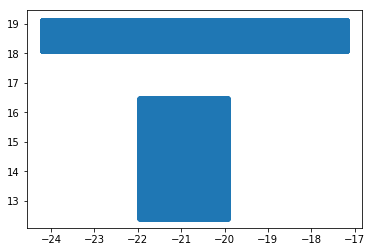

In [6]:
plt.scatter(loc[:,1],loc[:,2])

In [7]:
bs_locations = np.zeros((loc.shape[0],3))
bs_locations[:,2] = 2.5

for i in range(num_rows_in_vertical_strip):
    arr = loc[num_users_per_vertical_row*i:num_users_per_vertical_row*(i+1)]
    # now solve the equation for arr[0] and arr[1].
    a1,b1 = arr[0,1],arr[0,2]
    a2,b2 = arr[1,1],arr[1,2]
    r1_sq,r2_sq = arr[0,4]**2-1.5**2 , arr[1,4]**2-1.5**2
    if b2==b1:
        x = (r1_sq - r2_sq + a2**2-a1**2 + b2**2-b1**2)/(2*(a2-a1))
        y = b1-np.sqrt(r1_sq - np.square(x-a1))
        bs_locations[num_users_per_horizontal_row*i:num_users_per_horizontal_row*(i+1), 0] = x
        bs_locations[num_users_per_horizontal_row*i:num_users_per_horizontal_row*(i+1), 1] = y
        
for i in range(num_rows_in_horizontal_strip):
    arr = loc[num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*i: num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*(i+1)]
    # now solve the equation for arr[0] and arr[1].
    a1,b1 = arr[0,1],arr[0,2]
    a2,b2 = arr[1,1],arr[1,2]
    r1_sq,r2_sq = arr[0,4]**2-1.5**2 , arr[1,4]**2-1.5**2
    if b2==b1:
        x = (r1_sq - r2_sq + a2**2-a1**2 + b2**2-b1**2)/(2*(a2-a1))
        y = b1-np.sqrt(r1_sq - np.square(x-a1))
        bs_locations[num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*i: num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*(i+1), 0] = x
        bs_locations[num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*i: num_rows_in_vertical_strip*num_users_per_vertical_row + num_users_per_horizontal_row*(i+1), 1] = y

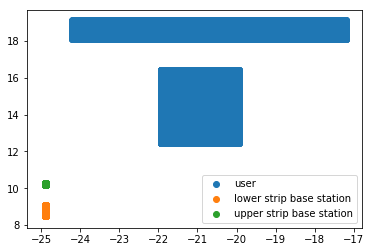

In [8]:
plt.scatter(loc[:,1],loc[:,2],label='user')
plt.scatter(bs_locations[:80601,0],bs_locations[:80601,1],label='lower strip base station')
plt.scatter(bs_locations[80601:,0],bs_locations[80601:,1],label='upper strip base station')
plt.legend()
plt.show()

In [9]:
loc = np.hstack((loc,bs_locations))
print(loc.shape)

(151402, 9)


In [10]:
np.save("/home/suchith/Documents/academics/sem7/btp/phase/code/DeepMIMO/RayTracing Scenarios/locarray",loc)

In [13]:
pd.DataFrame(loc)

,0,1,2,3,4,5,6,7,8
0,1.0,-21.9427,12.4355,1.0,5.14423,49.6186,-24.886985,8.492876,2.5
1,2.0,-21.9327,12.4355,1.0,5.14996,49.8478,-24.886985,8.492876,2.5
2,3.0,-21.9227,12.4355,1.0,5.15570,50.0685,-24.886985,8.492876,2.5
3,4.0,-21.9127,12.4355,1.0,5.16146,50.2001,-24.886985,8.492876,2.5
4,5.0,-21.9027,12.4355,1.0,5.16723,50.2198,-24.886985,8.492876,2.5
5,6.0,-21.8927,12.4355,1.0,5.17301,50.1837,-24.886985,8.492876,2.5
6,7.0,-21.8827,12.4355,1.0,5.17881,50.1868,-24.886985,8.492876,2.5
7,8.0,-21.8727,12.4355,1.0,5.18462,50.3057,-24.886985,8.492876,2.5
8,9.0,-21.8627,12.4355,1.0,5.19044,50.5634,-24.886985,8.492876,2.5
9,10.0,-21.8527,12.4355,1.0,5.19627,50.9193,-24.886985,8.492876,2.5
